Matplotlib is building the font cache; this may take a moment.


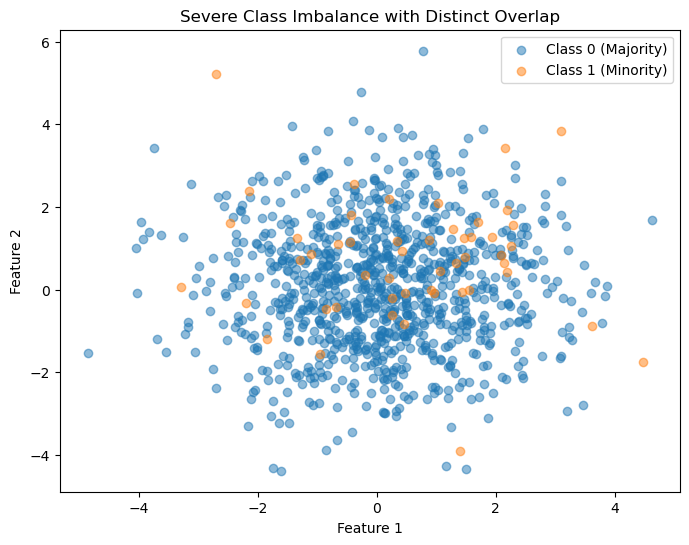

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples for each class
n_majority = 950
n_minority = 50

# Generate majority class (Class 0) - Clustered around (0,0)
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))

# Generate minority class (Class 1) - Overlapping but slightly shifted
minority_class = np.random.normal(loc=[0.5, 0.5], scale=[1.5, 1.5], size=(n_minority, 2))

# Create labels
labels_majority = np.zeros(n_majority)
labels_minority = np.ones(n_minority)

# Combine data
X = np.vstack((majority_class, minority_class))
y = np.hstack((labels_majority, labels_minority))

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Class'] = y.astype(int)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Class'] == 0]['Feature_1'], df[df['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df[df['Class'] == 1]['Feature_1'], df[df['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5)
plt.legend()
plt.title("Severe Class Imbalance with Distinct Overlap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


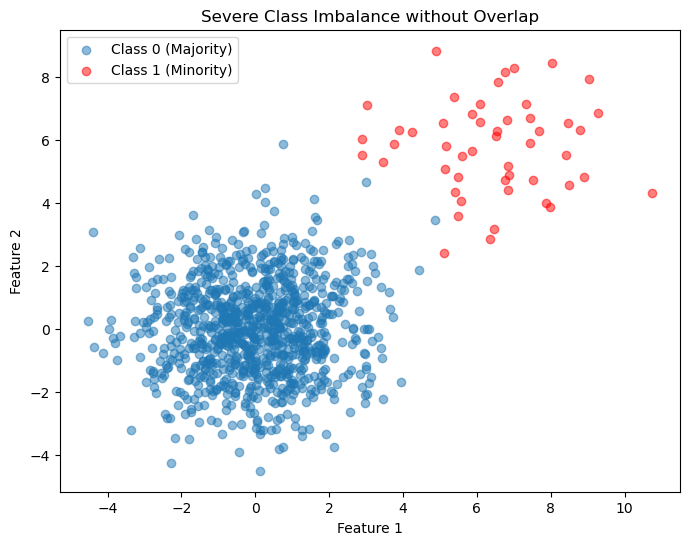

In [2]:
# Generate majority class (Class 0) - Clustered around (0,0)
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))

# Generate minority class (Class 1) - Clearly separated
minority_class = np.random.normal(loc=[6, 6], scale=[1.5, 1.5], size=(n_minority, 2))

# Create labels
labels_majority = np.zeros(n_majority)
labels_minority = np.ones(n_minority)

# Combine data
X_separated = np.vstack((majority_class, minority_class))
y_separated = np.hstack((labels_majority, labels_minority))

# Create a DataFrame
df_separated = pd.DataFrame(X_separated, columns=['Feature_1', 'Feature_2'])
df_separated['Class'] = y_separated.astype(int)


# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_separated[df_separated['Class'] == 0]['Feature_1'], df_separated[df_separated['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_separated[df_separated['Class'] == 1]['Feature_1'], df_separated[df_separated['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Severe Class Imbalance without Overlap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


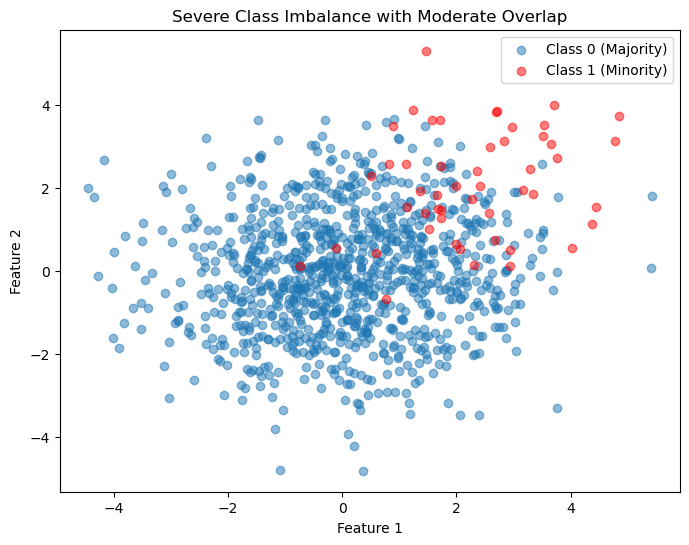

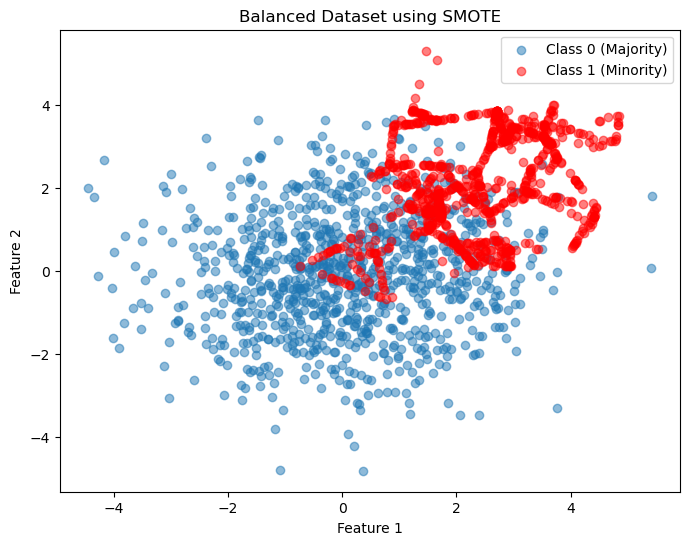

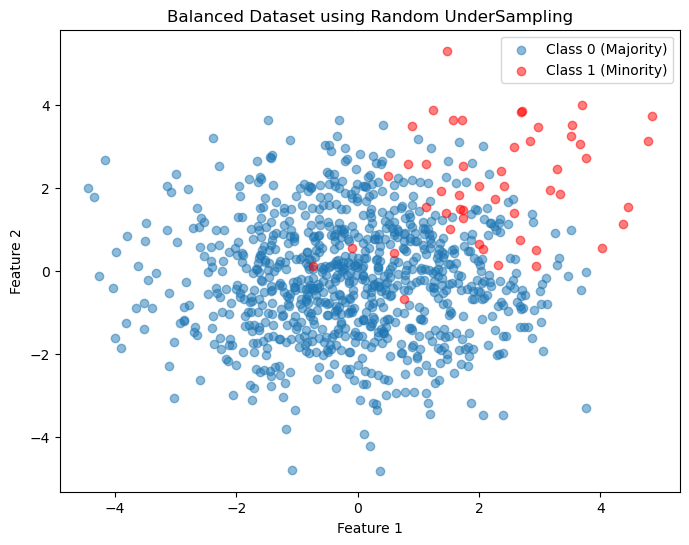

In [25]:
# Generate majority class (Class 0) - Clustered around (0,0)
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))

# Generate minority class (Class 1) - Moderately overlapping with a slight shift
minority_class = np.random.normal(loc=[2, 2], scale=[1.5, 1.5], size=(n_minority, 2))

# Create labels
labels_majority = np.zeros(n_majority)
labels_minority = np.ones(n_minority)

# Combine data
X_moderate = np.vstack((majority_class, minority_class))
y_moderate = np.hstack((labels_majority, labels_minority))

# Create a DataFrame
df_moderate = pd.DataFrame(X_moderate, columns=['Feature_1', 'Feature_2'])
df_moderate['Class'] = y_moderate.astype(int)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_moderate[df_moderate['Class'] == 0]['Feature_1'], df_moderate[df_moderate['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_moderate[df_moderate['Class'] == 1]['Feature_1'], df_moderate[df_moderate['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Severe Class Imbalance with Moderate Overlap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply SMOTE to oversample the original data
from imblearn.over_sampling import SMOTE

# Initialize SMOTE object
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(df_moderate[['Feature_1', 'Feature_2']], df_moderate['Class'])

# Create a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=['Feature_1', 'Feature_2'])
df_resampled['Class'] = y_resampled.astype(int)


# Plot the resampled dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_resampled[df_resampled['Class'] == 0]['Feature_1'], df_resampled[df_resampled['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_resampled[df_resampled['Class'] == 1]['Feature_1'], df_resampled[df_resampled['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Balanced Dataset using SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# undersample the original data
from imblearn.under_sampling import NeighbourhoodCleaningRule

# Initialize RandomUnderSampler object
ncr = NeighbourhoodCleaningRule(sampling_strategy='majority')

# Apply RandomUnderSampler to generate undersampled data
X_resampled, y_resampled = ncr.fit_resample(df_moderate[['Feature_1', 'Feature_2']], df_moderate['Class'])

# Create a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=['Feature_1', 'Feature_2'])
df_resampled['Class'] = y_resampled.astype(int)

# Plot the resampled dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_resampled[df_resampled['Class'] == 0]['Feature_1'], df_resampled[df_resampled['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_resampled[df_resampled['Class'] == 1]['Feature_1'], df_resampled[df_resampled['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Balanced Dataset using Random UnderSampling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Function to train classifiers and report performance
def evaluate_classifiers(df, dataset_name):
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize classifiers
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42)
    }

    results = {}

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = report

    return results

# Evaluate classifiers on the three datasets
results_severe_overlap = evaluate_classifiers(df, "Severe Overlap")
results_no_overlap = evaluate_classifiers(df_separated, "No Overlap")
results_moderate_overlap = evaluate_classifiers(df_moderate, "Moderate Overlap")

# Display results
results_summary = {
    "Dataset": [],
    "Classifier": [],
    "Precision (Class 1)": [],
    "Recall (Class 1)": [],
    "F1-Score (Class 1)": [],
    "Accuracy": []
}

for dataset_name, results in zip(
    ["Severe Overlap", "No Overlap", "Moderate Overlap"],
    [results_severe_overlap, results_no_overlap, results_moderate_overlap]
):
    for clf_name, metrics in results.items():
        results_summary["Dataset"].append(dataset_name)
        results_summary["Classifier"].append(clf_name)
        results_summary["Precision (Class 1)"].append(metrics["1"]["precision"])
        results_summary["Recall (Class 1)"].append(metrics["1"]["recall"])
        results_summary["F1-Score (Class 1)"].append(metrics["1"]["f1-score"])
        results_summary["Accuracy"].append(metrics["accuracy"])

df_results = pd.DataFrame(results_summary)
df_results.head(20)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Dataset,Classifier,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Accuracy
0,Severe Overlap,Random Forest,0.0000,0.000000,0.000000,0.940000
1,Severe Overlap,SVM,0.0000,0.000000,0.000000,0.950000
2,No Overlap,Random Forest,0.9375,1.000000,0.967742,0.996667
3,No Overlap,SVM,0.9375,1.000000,0.967742,0.996667
4,Moderate Overlap,Random Forest,0.5000,0.333333,0.400000,0.950000
5,Moderate Overlap,SVM,0.6000,0.200000,0.300000,0.953333


In [7]:
# Correcting the classifier initialization
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Function to compute AUC scores
def compute_auc_scores(df, dataset_name):
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize classifiers with probability estimation enabled
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42, probability=True)
    }

    auc_scores = []

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for Class 1
        auc = roc_auc_score(y_test, y_prob)
        auc_scores.append({"Dataset": dataset_name, "Classifier": name, "AUC Score": auc})

    return auc_scores

# Compute AUC scores for each dataset
auc_results = []
auc_results.extend(compute_auc_scores(df, "Severe Overlap"))
auc_results.extend(compute_auc_scores(df_separated, "No Overlap"))
auc_results.extend(compute_auc_scores(df_moderate, "Moderate Overlap"))

# Convert to DataFrame and display
df_auc_results = pd.DataFrame(auc_results)
df_auc_results.head(20)


,Dataset,Classifier,AUC Score
0,Severe Overlap,Random Forest,0.538480
1,Severe Overlap,SVM,0.469240
2,No Overlap,Random Forest,0.999064
3,No Overlap,SVM,0.999766
4,Moderate Overlap,Random Forest,0.819649
5,Moderate Overlap,SVM,0.702222


In [8]:
from sklearn.metrics import balanced_accuracy_score

# Function to compute Balanced Accuracy scores
def compute_balanced_accuracy_scores(df, dataset_name):
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize classifiers
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42)
    }

    balanced_acc_scores = []

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)  # Get predicted labels
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        balanced_acc_scores.append({"Dataset": dataset_name, "Classifier": name, "Balanced Accuracy Score": balanced_acc})

    return balanced_acc_scores

# Compute Balanced Accuracy scores for each dataset
balanced_acc_results = []
balanced_acc_results.extend(compute_balanced_accuracy_scores(df, "Severe Overlap"))
balanced_acc_results.extend(compute_balanced_accuracy_scores(df_separated, "No Overlap"))
balanced_acc_results.extend(compute_balanced_accuracy_scores(df_moderate, "Moderate Overlap"))

# Convert to DataFrame and display
df_balanced_acc_results = pd.DataFrame(balanced_acc_results)
df_balanced_acc_results.head(20)


,Dataset,Classifier,Balanced Accuracy Score
0,Severe Overlap,Random Forest,0.494737
1,Severe Overlap,SVM,0.500000
2,No Overlap,Random Forest,0.998246
3,No Overlap,SVM,0.998246
4,Moderate Overlap,Random Forest,0.657895
5,Moderate Overlap,SVM,0.596491


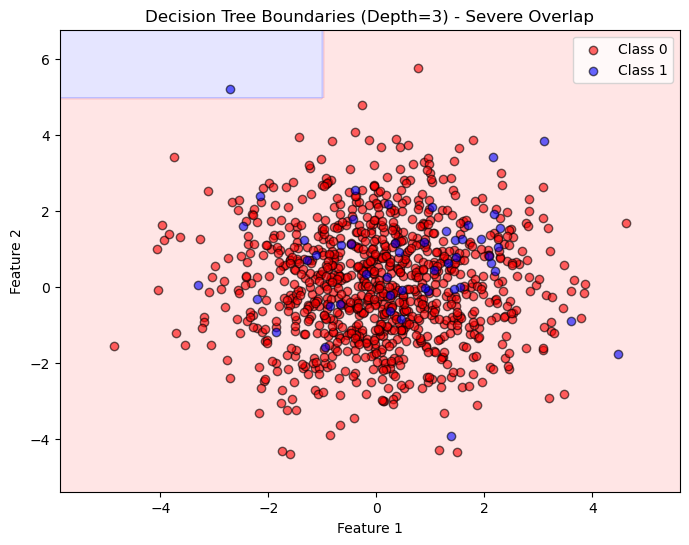

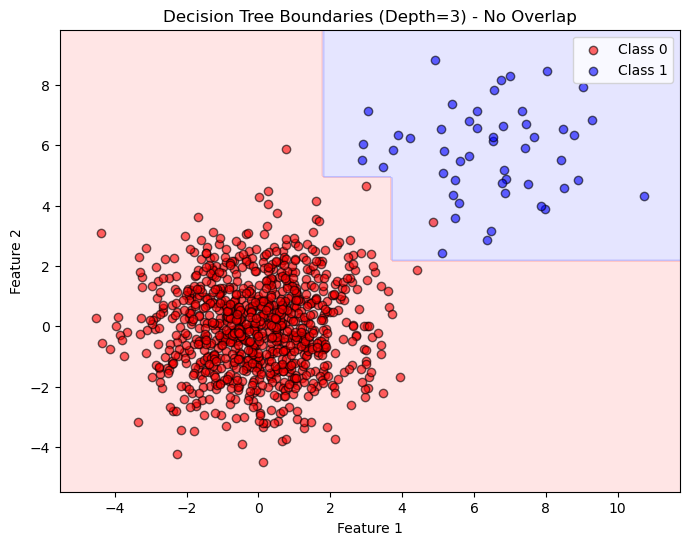

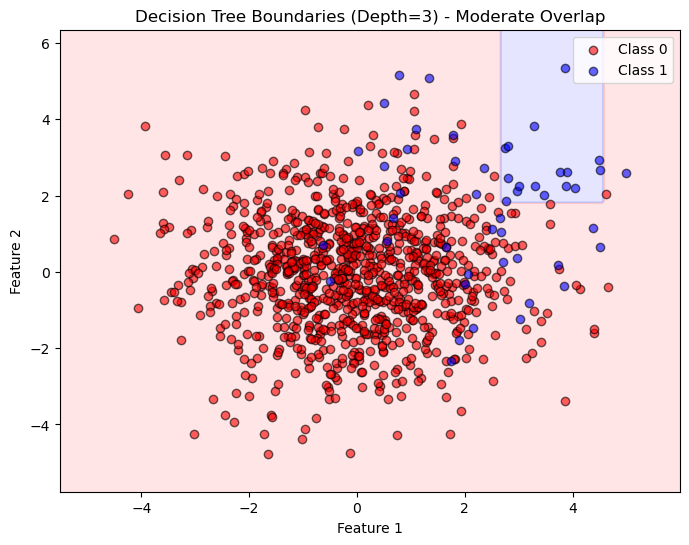

In [9]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Regenerate datasets

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples for each class
n_majority = 950
n_minority = 50

# Severe Overlap Dataset
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class = np.random.normal(loc=[0.5, 0.5], scale=[1.5, 1.5], size=(n_minority, 2))
X = np.vstack((majority_class, minority_class))
y = np.hstack((np.zeros(n_majority), np.ones(n_minority)))
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Class'] = y.astype(int)

# No Overlap Dataset
majority_class_no = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class_no = np.random.normal(loc=[6, 6], scale=[1.5, 1.5], size=(n_minority, 2))
X_separated = np.vstack((majority_class_no, minority_class_no))
y_separated = np.hstack((np.zeros(n_majority), np.ones(n_minority)))
df_separated = pd.DataFrame(X_separated, columns=['Feature_1', 'Feature_2'])
df_separated['Class'] = y_separated.astype(int)

# Moderate Overlap Dataset
majority_class_mo = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class_mo = np.random.normal(loc=[2, 2], scale=[1.5, 1.5], size=(n_minority, 2))
X_moderate = np.vstack((majority_class_mo, minority_class_mo))
y_moderate = np.hstack((np.zeros(n_majority), np.ones(n_minority)))
df_moderate = pd.DataFrame(X_moderate, columns=['Feature_1', 'Feature_2'])
df_moderate['Class'] = y_moderate.astype(int)

# Function to train a Decision Tree and plot decision boundaries
def plot_decision_tree_boundaries(df, dataset_name):
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Train a Decision Tree with max depth 3
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X, y)

    # Create mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define colormap for decision regions
    cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
    cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

    # Plot the decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Class 0", alpha=0.6, edgecolors="k")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Class 1", alpha=0.6, edgecolors="k")
    
    plt.legend()
    plt.title(f"Decision Tree Boundaries (Depth=3) - {dataset_name}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundaries for each dataset
plot_decision_tree_boundaries(df, "Severe Overlap")
plot_decision_tree_boundaries(df_separated, "No Overlap")
plot_decision_tree_boundaries(df_moderate, "Moderate Overlap")


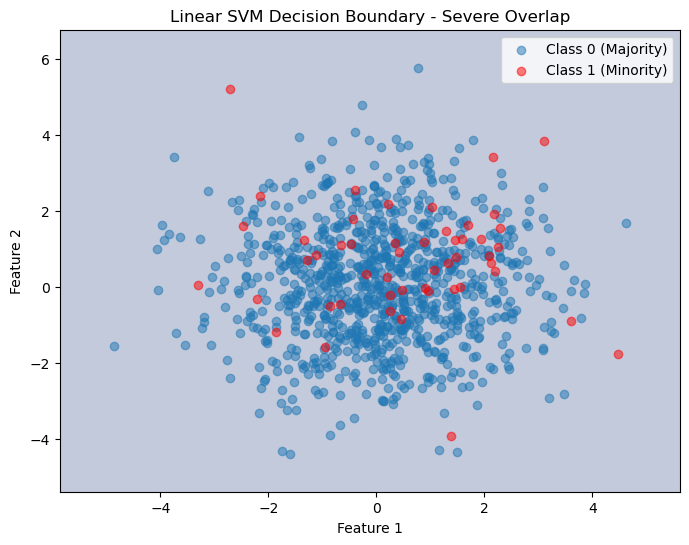

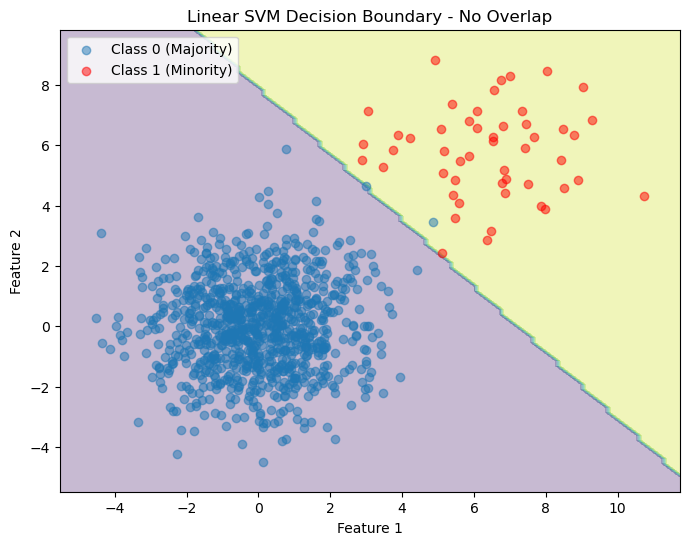

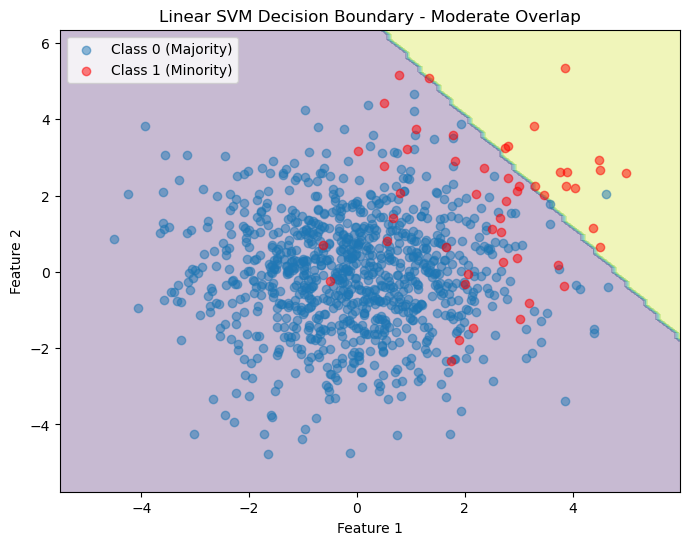

In [10]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples for each class
n_majority = 950
n_minority = 50

# Generate datasets with different levels of class overlap
# Severe Overlap
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class = np.random.normal(loc=[0.5, 0.5], scale=[1.5, 1.5], size=(n_minority, 2))
X_severe = np.vstack((majority_class, minority_class))
y_severe = np.hstack((np.zeros(n_majority), np.ones(n_minority)))

# No Overlap
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class = np.random.normal(loc=[6, 6], scale=[1.5, 1.5], size=(n_minority, 2))
X_no_overlap = np.vstack((majority_class, minority_class))
y_no_overlap = np.hstack((np.zeros(n_majority), np.ones(n_minority)))

# Moderate Overlap
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class = np.random.normal(loc=[2, 2], scale=[1.5, 1.5], size=(n_minority, 2))
X_moderate = np.vstack((majority_class, minority_class))
y_moderate = np.hstack((np.zeros(n_majority), np.ones(n_minority)))

# Function to plot decision boundaries
def plot_decision_boundary(X, y, clf, dataset_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0 (Majority)", alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1 (Minority)", alpha=0.5, color='r')
    plt.legend()
    plt.title(f"Linear SVM Decision Boundary - {dataset_name}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Function to train and plot Linear SVM decision boundaries
def apply_linear_svm_and_plot(X, y, dataset_name):
    # Train Linear SVM
    clf = SVC(kernel="linear", random_state=42)
    clf.fit(X, y)

    # Plot decision boundary
    plot_decision_boundary(X, y, clf, dataset_name)

# Apply Linear SVM and plot decision boundaries for each dataset
apply_linear_svm_and_plot(X_severe, y_severe, "Severe Overlap")
apply_linear_svm_and_plot(X_no_overlap, y_no_overlap, "No Overlap")
apply_linear_svm_and_plot(X_moderate, y_moderate, "Moderate Overlap")


In [17]:
# Function to evaluate the Linear SVM model and compute metrics robustly
def evaluate_linear_svm_fixed(X, y, dataset_name):
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train Linear SVM
    clf = SVC(kernel="linear", random_state=42, probability=True)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for AUC

    # Compute metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Handle cases where Class 1 is not predicted
    print(report)
    return {
        "Dataset": dataset_name,
        "Precision (Class 1)": report["1.0"]["precision"],
        "Recall (Class 1)": report["1.0"]["recall"],
        "F1-Score (Class 1)": report["1.0"]["f1-score"],
        "Accuracy": report["accuracy"],
        "AUC Score": auc,
        "Balanced Accuracy Score": balanced_acc,
    }

# Evaluate the Linear SVM on each dataset
svm_results_fixed = []
svm_results_fixed.append(evaluate_linear_svm_fixed(X_severe, y_severe, "Severe Overlap"))
svm_results_fixed.append(evaluate_linear_svm_fixed(X_no_overlap, y_no_overlap, "No Overlap"))
svm_results_fixed.append(evaluate_linear_svm_fixed(X_moderate, y_moderate, "Moderate Overlap"))

# Convert to DataFrame and display results
df_svm_results_fixed = pd.DataFrame(svm_results_fixed)
df_svm_results_fixed.head(20)


{'0.0': {'precision': 0.95, 'recall': 1.0, 'f1-score': 0.9743589743589743, 'support': 285.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15.0}, 'accuracy': 0.95, 'macro avg': {'precision': 0.475, 'recall': 0.5, 'f1-score': 0.48717948717948717, 'support': 300.0}, 'weighted avg': {'precision': 0.9025, 'recall': 0.95, 'f1-score': 0.9256410256410256, 'support': 300.0}}
{'0.0': {'precision': 1.0, 'recall': 0.9964912280701754, 'f1-score': 0.9982425307557118, 'support': 285.0}, '1.0': {'precision': 0.9375, 'recall': 1.0, 'f1-score': 0.967741935483871, 'support': 15.0}, 'accuracy': 0.9966666666666667, 'macro avg': {'precision': 0.96875, 'recall': 0.9982456140350877, 'f1-score': 0.9829922331197913, 'support': 300.0}, 'weighted avg': {'precision': 0.996875, 'recall': 0.9966666666666667, 'f1-score': 0.9967175009921198, 'support': 300.0}}
{'0.0': {'precision': 0.9625850340136054, 'recall': 0.9929824561403509, 'f1-score': 0.9775474956822107, 'support': 285.0}, '1.0': {'pre

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Dataset,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Accuracy,AUC Score,Balanced Accuracy Score
0,Severe Overlap,0.000000,0.000000,0.000000,0.950000,0.498480,0.500000
1,No Overlap,0.937500,1.000000,0.967742,0.996667,0.999766,0.998246
2,Moderate Overlap,0.666667,0.266667,0.380952,0.956667,0.913450,0.629825
